In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from tensorflow.keras.utils import to_categorical # one-hot keras encording
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(3)
tf.random.set_seed(3)

## 1. 데이터 읽어오기

In [2]:
df1 = pd.read_csv('C:/Users/user/ILIFO/DeepLearning/deeplearning_class-master/dataset/housing.csv',header=None,delim_whitespace =True)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df = np.loadtxt('C:/Users/user/ILIFO/DeepLearning/deeplearning_class-master/dataset/housing.csv')
df

## 2. 데이터 전처리

In [3]:
dataset = df1.values
X = dataset[:,0:13]
Y = dataset[:,13]

In [ ]:
X = df[:,0:13]
Y = df[:,13]

In [4]:
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

In [5]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.2)
x_train

array([[9.51363e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        6.68000e+00, 1.87100e+01],
       [4.03841e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.95330e+02, 1.28700e+01],
       [3.70500e-02, 2.00000e+01, 3.33000e+00, ..., 1.49000e+01,
        3.92230e+02, 4.59000e+00],
       ...,
       [1.90730e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
        3.93740e+02, 6.56000e+00],
       [1.12658e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.43280e+02, 1.21200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.80790e+02, 1.01900e+01]])

## 3. 모델 설계

In [12]:
model = Sequential()

# 입력데이터 17개의 값을 받아 은닉층 30개 노드로 보낸다
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, input_dim=30, activation='relu'))
model.add(Dense(1))

## 4. 모델 컴파일

In [13]:
model.compile(loss='mean_squared_error',
          optimizer='adam',
          metrics=['accuracy'])

## 5. 학습

In [14]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

h = model.fit(x_train, y_train, validation_split= 0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 3552.81104, saving model to ./model/01-3552.8110.hdf5

Epoch 00002: val_loss improved from 3552.81104 to 3076.83643, saving model to ./model/02-3076.8364.hdf5

Epoch 00003: val_loss improved from 3076.83643 to 2677.98779, saving model to ./model/03-2677.9878.hdf5

Epoch 00004: val_loss improved from 2677.98779 to 2345.16553, saving model to ./model/04-2345.1655.hdf5

Epoch 00005: val_loss improved from 2345.16553 to 2072.66479, saving model to ./model/05-2072.6648.hdf5

Epoch 00006: val_loss improved from 2072.66479 to 1845.78552, saving model to ./model/06-1845.7855.hdf5

Epoch 00007: val_loss improved from 1845.78552 to 1655.58911, saving model to ./model/07-1655.5891.hdf5

Epoch 00008: val_loss improved from 1655.58911 to 1500.05859, saving model to ./model/08-1500.0586.hdf5

Epoch 00009: val_loss improved from 1500.05859 to 1380.89172, saving model to ./model/09-1380.8917.hdf5

Epoch 00010: val_loss improved from 1380.89172 to 1290.48474,

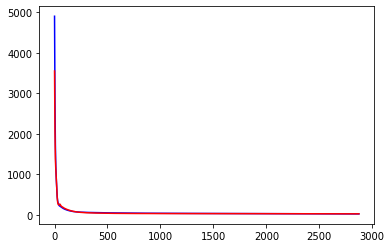

In [15]:
plt.plot(h.history['loss'],'b')
plt.plot(h.history['val_loss'],'r')
plt.show()

In [16]:
h.history['loss'][-1]

20.434093475341797